<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/Chapter6_1_introduction_to_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to K means

K-means clustering is an unsupervised machine learning algorithm that groups unlabeled data into a predefined number of clusters. It is one of the most popular clustering algorithms due to its simplicity and effectiveness.


![K-means](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)


---
##1.&nbsp; Import libraries and files 💾

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ID of the Google Sheet for student food preferences
sheet_id = "1gYXqOBLEYIr99YmKGq2nIvK3CJmoWzsvwfwR9adfo2w"

# Title of the Google Sheet
sheet_name = "18136796"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Create a Pandas DataFrame from the CSV data
foods_df = pd.read_csv(url,
                       index_col="student")

# Drop age - we only care about food here (we'll use age when we learn to scale data)
# Drop favorite_color - why can't we use a color to calculate distances
to_drop = ['age', 'favorite_color']
foods_df = foods_df.drop(columns=to_drop)

---
##2.&nbsp; Explore the data 👩‍🚀

In [5]:
foods_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Alexandra,10,10,10,10,10,7,6,10,0
Andrea,10,10,1,1,10,9,10,4,2
Daniel,10,10,10,0,3,10,10,10,10
Josef,3,3,9,9,5,5,8,10,7
Kaj,3,10,7,8,8,10,8,10,9
Katherine,5,0,9,5,10,8,10,5,8
Leslie,7,3,3,5,3,7,7,5,1
Merry,8,5,0,0,2,9,8,0,4
Perry,8,0,5,0,0,8,4,0,0


What kind of foods do you all like the most?

In [6]:
# Calculate the average score for each column
average_scores = foods_df.mean()

# Sort the columns by their average scores in descending order
sorted_columns = average_scores.sort_values(ascending=False)

# Select the top 3 columns from the sorted DataFrame
top_3_columns = sorted_columns[:3]

# Print the top 3 columns
top_3_columns

peas        8.000000
olives      7.833333
broccoli    6.750000
dtype: float64

Which 3 foods do you all like the least?

In [7]:
# Select the lowest 3 columns from the sorted DataFrame
lowest_3_columns = sorted_columns[-3:]

# Print the top 3 columns
lowest_3_columns

brussels_sprouts    4.916667
whisky              4.416667
oysters (raw)       3.166667
dtype: float64

If you want to explore the data further, look for:

- Strong positive or negative correlations between particular foods.
- Foods with a significantly larger or smaller standard deviation than others.
- Students who are consistently high or low scorers.

These differences in the data show that real-world data can be tricky. Large distances can arise due to differences in our data collection and the data itself. One approach to help deal with this problem is scaling, which we'll discuss in the next notebook.

---
## 3.&nbsp; Clustering in 2 dimensions ➡️

Two dimensions are chosen for visualisation purposes, as clustering results can be effectively plotted on a graph to understand how data points are grouped. While the core K-Means algorithm works for any number of dimensions, visualizing high-dimensional clusters becomes impossible. We will explore the two-dimensional case to gain a foundational understanding before tackling clustering in datasets with more features.

First, we create a small copy of our original dataframe with only 2 dimensions.

> Dataframe columns are called dimensions, features, and sometimes just columns. It's helpful to be comfortable with these interchangeable terms.

In [8]:
two_features_df = foods_df.iloc[:, :2].copy()
two_features_df

,broccoli,brussels_sprouts
student,,
Alexandra,10,10
Andrea,10,10
Daniel,10,10
Josef,3,3
Kaj,3,10
Katherine,5,0
Leslie,7,3
Merry,8,5
Perry,8,0


Now we will `.fit()` the k-means model to our data.
> `.fit()` performs a lot of calculations and stores the data in the given variable. It does not change our original dataframe, but uses the data from it.

In [9]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123

my_2d_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_2d_kmeans.fit(two_features_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

Now that we have fitted our model. We can explore the calculations it made, such as who ended up in which cluster.

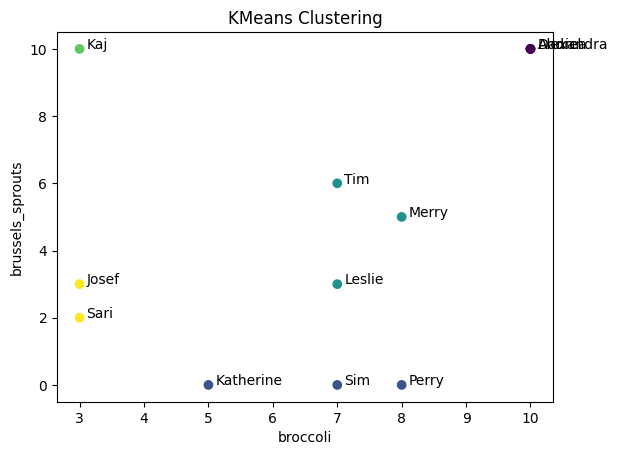

In [10]:
# @title Visualisation of data points and clusters

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Annotate the data points
for idx, row in two_features_df.iterrows():
    plt.annotate(idx, (row["broccoli"], row["brussels_sprouts"]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

By including the cluster centers in the plot, we can gain a clearer understanding of the data distribution.
> The annotations are omitted here to avoid clutter

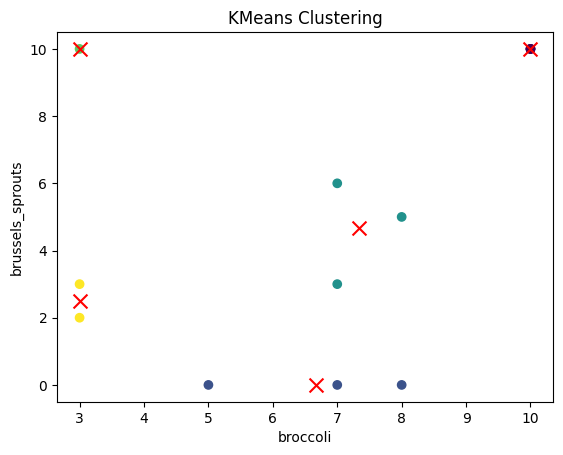

In [11]:
# @title Clusters and centroids

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Plot the cluster centers
plt.scatter(x = my_2d_kmeans.cluster_centers_[:, 0],
            y = my_2d_kmeans.cluster_centers_[:, 1],
            c = 'red',
            marker = 'x',
            s = 100)

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

If we label all the data points, our visualisation will become cluttered.  Therefore, we should explore this data in tabular form to see who was seated next to whom at lunch, based on their preferences for broccoli and Brussels sprouts.

In [12]:
# obtain the cluster output
table = my_2d_kmeans.labels_

# attach the cluster output to our original DataFrame
two_features_df["table"] = table

two_features_df.sort_values(by="table")

,broccoli,brussels_sprouts,table
student,,,
Alexandra,10,10,0
Andrea,10,10,0
Daniel,10,10,0
Katherine,5,0,1
Perry,8,0,1
Sim,7,0,1
Leslie,7,3,2
Merry,8,5,2
Tim,7,6,2


---
## 4.&nbsp; How does k-means find the centroids ❌

K-means clustering is an iterative algorithm that tries to partition a dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The algorithm minimises the distance between data points within a cluster and maximises the distance between data points in different clusters.

Steps:

1. Specify the number of clusters, K.
2. Select K points at random to act as the centroids of the clusters.
3. Assign each data point to the closest centroid.
4. Compute new centroids for each cluster by moving the centroid to the center of the data points assigned to that cluster.
5. Repeat steps 3 and 4 until the centroids no longer change.

[This website](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) is great for showing how k-means clusters and re-clusters. Please take a look and play around.

---
## 5.&nbsp; Clustering in multiple dimensions 🔀

Having explored K-Means clustering in two dimensions for visual clarity, let's now tackle the more general scenario: high-dimensional data. Here, the intuitive plotting techniques used in two dimensions become impractical.

In [13]:
# initialize the model
my_full_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                        random_state = random_seed)

# fit the model to the data
my_full_kmeans.fit(foods_df)

# obtain the cluster output
table = my_full_kmeans.labels_

# attach the cluster output to our original DataFrame
foods_df["table"] = table

foods_df.sort_values(by="table")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,table
student,,,,,,,,,,
Leslie,7,3,3,5,3,7,7,5,1,0
Merry,8,5,0,0,2,9,8,0,4,0
Perry,8,0,5,0,0,8,4,0,0,0
Sari,3,2,0,0,7,10,6,6,7,0
Sim,7,0,0,0,3,5,7,0,2,0
Josef,3,3,9,9,5,5,8,10,7,1
Katherine,5,0,9,5,10,8,10,5,8,1
Daniel,10,10,10,0,3,10,10,10,10,2
Tim,7,6,8,0,0,8,10,7,3,2


Who's table have you ended up at? Look at the food ratings, why do you think that is?

---
## 6.&nbsp; Challenge: apply this to the spotify dataset 😃

### 6.1.&nbsp; Explore the 10 songs dataset

Import the 10 songs dataset into a new notebook and explore it like we did at the beginning of this notebook. Do you agree with the liveliness scores that certain songs have been given? Do you think the top 3 most danceable songs are the most danceable songs in the list? Ask questions of the data and see where it leads you.

If you're not familiar with any of the songs, look them up on YouTube or Spotify and listen to at least 30 seconds of each song to get a feel for them. Even if you're not a music expert we can all tell the difference between gangster rap and classical, right? Look at the scores given and see if they make sense with **how these songs make you feel**.

In [24]:
import pandas as pd
# you need first download this sheet to local folder and then upload to google konto, then open the file in Google sheet.
# google sheet address
# https://docs.google.com/spreadsheets/d/1XYyQxYlENSy0H1r6gn2ZVnEZd9QcGARgVNPdIB5XfC0/edit#gid=1111508644
# ID of the Google Sheet for 10 songs
sheet_id = "1XYyQxYlENSy0H1r6gn2ZVnEZd9QcGARgVNPdIB5XfC0"
# title of the google sheet
sheet_name = "1111508644"
# URL to download the Google Sheet as a CSV
# then change the sheet permission to anyone with the link has right to change or modify it.
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"
songs_df = pd.read_csv(url,index_col="song_name")
print(songs_df)

                                                                  artist  \
song_name                                                                  
My Band                                                              D12   
The Real Slim Shady                                               Eminem   
Águas De Março                                      Antônio Carlos Jobim   
The Girl From Ipanema                                          Stan Getz   
Paint It, Black                                       The Rolling Stones   
Sultans Of Swing                                            Dire Straits   
Space Raiders - Charlotte de Witte Remix                 Eats Everything   
In Silence                                                   Amelie Lens   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...       Johannes Brahms   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...       Frédéric Chopin   

                                                    danceability   energy  \
song_name 

In [25]:
songs_df

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
song_name,,,,,,,,,,,,,,,,
My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [26]:
# drop artist, ID and html-- we only care about the music self
to_drop = ['artist','id','html']
songs_df = songs_df.drop(columns=to_drop)

In [27]:
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,
My Band,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
The Real Slim Shady,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
Águas De Março,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
The Girl From Ipanema,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
"Paint It, Black",0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
Sultans Of Swing,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
Space Raiders - Charlotte de Witte Remix,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
In Silence,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3


Question: what kind of features do the users llike the most?

In [28]:
# Calculate the average score for each column
average_scores = songs_df.mean()

# Sort the columns by their average scores in descending order
sorted_columns = average_scores.sort_values(ascending=False)

# Select the top 3 columns from the sorted DataFrame
top_3_columns = sorted_columns[:3]

# Print the top 3 columns
top_3_columns

duration_ms       287493.800
tempo                118.716
time_signature         3.900
dtype: float64

Question: which are the 3 least like features?

In [29]:
# Select the lowest 3 columns from the sorted DataFrame
lowest_3_columns = sorted_columns[-3:]

# Print the top 3 columns
lowest_3_columns

liveness        0.15384
speechiness     0.06763
loudness      -14.02930
dtype: float64

### 6.2 Explore the dataset in dimensions
Change the code above in the section `Clustering in 2 dimensions` and re-cluster the data using different columns. Explore what happens with different pairs of columns. Why do people change tables? How different does the data look each time?

First, we create a small copy of our original dataframe with only 2 dimensions.

Dataframe columns are called dimensions, features, and sometimes just columns. It's helpful to be comfortable with these interchangeable terms.

In [30]:
two_features_df = songs_df.iloc[:, :2].copy() # danceability	energy
two_features_df

,danceability,energy
song_name,,
My Band,0.851,0.84900
The Real Slim Shady,0.949,0.66100
Águas De Março,0.642,0.33900
The Girl From Ipanema,0.641,0.14000
"Paint It, Black",0.464,0.79500
Sultans Of Swing,0.733,0.79400
Space Raiders - Charlotte de Witte Remix,0.749,0.73100
In Silence,0.736,0.84500
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833


Now we will .fit() the k-means model to our data.

.fit() performs a lot of calculations and stores the data in the given variable. It does not change our original dataframe, but uses the data from it.

In [31]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123

my_2d_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_2d_kmeans.fit(two_features_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

**Visualisaation of data points and clusters**

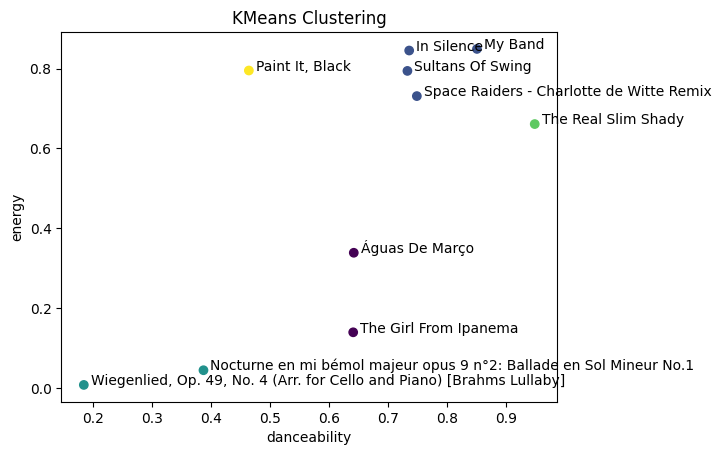

In [32]:
# @title Visualisation of data points and clusters

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Annotate the data points
for idx, row in two_features_df.iterrows():
    plt.annotate(idx, (row["danceability"], row["energy"]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

**Clusters and centroids**

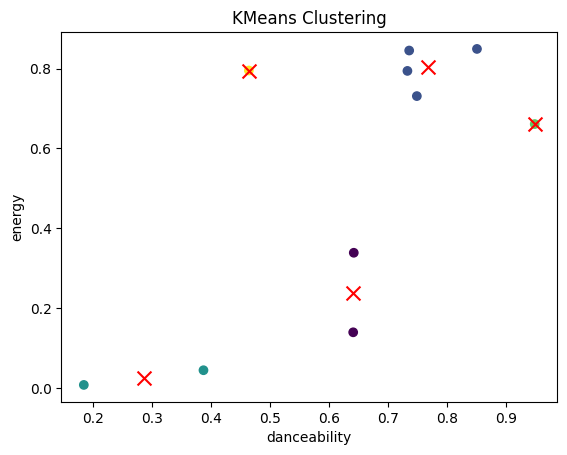

In [33]:
# @title Clusters and centroids

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Plot the cluster centers
plt.scatter(x = my_2d_kmeans.cluster_centers_[:, 0],
            y = my_2d_kmeans.cluster_centers_[:, 1],
            c = 'red',
            marker = 'x',
            s = 100)

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

If we label all the data points, our visualisation will become cluttered. Therefore, we should explore this data in tabular form to see which songs can be similar categorized together, based on their value of the danceability and energy.

In [35]:
# obtain the cluster output
category = my_2d_kmeans.labels_

# attach the cluster output to our original DataFrame
two_features_df["category"] = category

two_features_df.sort_values(by="category")

,danceability,energy,category
song_name,,,
Águas De Março,0.642,0.33900,0
The Girl From Ipanema,0.641,0.14000,0
My Band,0.851,0.84900,1
Sultans Of Swing,0.733,0.79400,1
Space Raiders - Charlotte de Witte Remix,0.749,0.73100,1
In Silence,0.736,0.84500,1
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833,2
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,0.387,0.04510,2
The Real Slim Shady,0.949,0.66100,3


### 6.3.&nbsp; Use KMeans to group the 10 songs dataset

Play around with the clustering algorithm and get familiar with it. What happens when you change the number of clusters? What number of clusters produces the best output? What happens when you change the number of the random seed?

*   **Clustering in multiple dimensions**





Having explored K-Means clustering in two dimensions for visual clarity, let's now tackle the more general scenario: high-dimensional data. Here, the intuitive plotting techniques used in two dimensions become impractical.

In [36]:
# initialize the model
my_full_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                        random_state = random_seed)

# fit the model to the data
my_full_kmeans.fit(songs_df)

# obtain the cluster output
category = my_full_kmeans.labels_

# attach the cluster output to our original DataFrame
songs_df["category"] = category

songs_df.sort_values(by="category")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,category
song_name,,,,,,,,,,,,,,
Águas De Março,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,0
"Paint It, Black",0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,0
The Girl From Ipanema,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,1
Sultans Of Swing,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,1
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,2
Space Raiders - Charlotte de Witte Remix,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,3
In Silence,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,3
My Band,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4
The Real Slim Shady,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,4


now if i change the n-cluster to 8 or 10, to see how it changes with the categorization of the songs.

In [38]:
# initialize the model
my_full_kmeans_8 = KMeans(n_clusters = 8, # we'll explore how to choose the number of clusters in a later notebook
                        random_state = random_seed)

# fit the model to the data
my_full_kmeans_8.fit(songs_df)

# obtain the cluster output
category = my_full_kmeans_8.labels_

# attach the cluster output to our original DataFrame
songs_df["category"] = category

songs_df.sort_values(by="category")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,category
song_name,,,,,,,,,,,,,,
Águas De Março,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,0
"Paint It, Black",0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,0
Sultans Of Swing,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,1
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,2
My Band,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,3
The Real Slim Shady,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3
Space Raiders - Charlotte de Witte Remix,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4
In Silence,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,5
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,6


### 6.4.&nbsp; Familiarise yourself with the documentation for scikit-learn

We'll be using scikit-learn a lot in the coming weeks, so it's a good idea to start familiarising yourself with its documentation now. The documentation is very well written, so be sure to check it out, start with the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) function that we used in this notebook. Play around with it and read up on some of the parameters that we didn't use.

### 6.5. [Optional bonus] See if you can learn to plot in 3 dimensions
Matplotlib allows you to visualise your data in 3D. Get creative and explore how to create a 3D scatter plot using different combinations of three columns from the food DataFrame. Once you have your data, experiment with clustering and assigning distinct colours to each cluster.

Compare the resulting clusters to those obtained using a 2D scatter plot. Does adding a third dimension significantly alter how the data points group together?

For an even more immersive experience, consider using Plotly, a Python library that enables interactive 3D scatter plots. Hovering your mouse over a data point in these plots reveals valuable information, such as the row index and cluster number.

In [39]:
# food_df 3D plotting, experiment with clustering and assigning distinct colours to each cluster.
three_features_df = foods_df.iloc[:, :3].copy()
three_features_df

,broccoli,brussels_sprouts,hamburger (meat)
student,,,
Alexandra,10,10,10
Andrea,10,10,1
Daniel,10,10,10
Josef,3,3,9
Kaj,3,10,7
Katherine,5,0,9
Leslie,7,3,3
Merry,8,5,0
Perry,8,0,5


In [40]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123

my_3d_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_3d_kmeans.fit(three_features_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

**random_seed=123** is a way to set the initial state of the random number generator. When you set a random seed, it ensures that the sequence of random numbers generated will be the same every time you run the code, as long as the seed value is the same.

**plt.scatter is designed for 2D plots**

**To create a 3D scatter plot, you need to use the mpl_toolkits.mplot3d module**

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

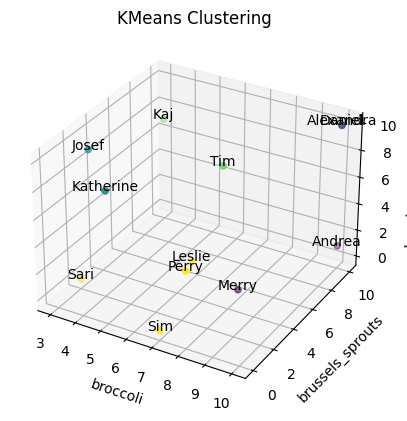

In [43]:
# Create a 3D figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(
    xs=three_features_df.iloc[:, 0],
    ys=three_features_df.iloc[:, 1],
    zs=three_features_df.iloc[:, 2],
    c=my_3d_kmeans.labels_,
    cmap='viridis'
)

# Annotate the data points
for idx, row in three_features_df.iterrows():
    ax.text(row["broccoli"], row["brussels_sprouts"], row["hamburger (meat)"], idx, ha='center')

# Add labels and title
ax.set_title('KMeans Clustering')
ax.set_xlabel(three_features_df.columns[0])
ax.set_ylabel(three_features_df.columns[1])
ax.set_zlabel(three_features_df.columns[2])

# Display the plot
plt.show()

Now choose other three parameters to have a look of the 3D table.

In [44]:
three_features_df_01 = foods_df.loc[:, ['broccoli','oysters (raw)', 'olives']].copy()
three_features_df_01

,broccoli,oysters (raw),olives
student,,,
Alexandra,10,10,6
Andrea,10,1,10
Daniel,10,0,10
Josef,3,9,8
Kaj,3,8,8
Katherine,5,5,10
Leslie,7,5,7
Merry,8,0,8
Perry,8,0,4


In [45]:
my_3d_kmeans_01 = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)
# 3. fit the model to the data
my_3d_kmeans_01.fit(three_features_df_01)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

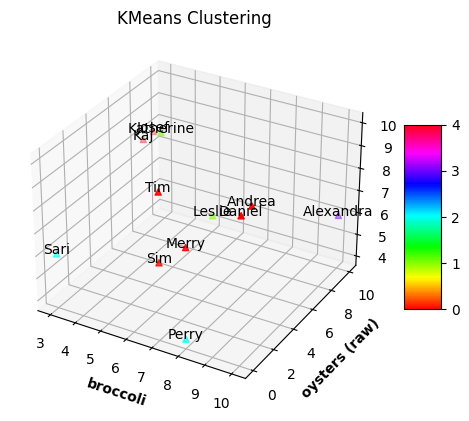

In [47]:
# Create a 3D figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Plot the data points
sctt = ax.scatter(
           xs=three_features_df_01.iloc[:, 0],
           ys=three_features_df_01.iloc[:, 1],
           zs=three_features_df_01.iloc[:, 2],
           c=my_3d_kmeans_01.labels_,
           cmap = my_cmap,
           marker ='^')

# Annotate the data points
for idx, row in three_features_df_01.iterrows():
    ax.text(row["broccoli"], row["oysters (raw)"], row["olives"], idx, ha='center')

# Add labels and title
ax.set_title('KMeans Clustering')
ax.set_xlabel(three_features_df_01.columns[0], fontweight ='bold')
ax.set_ylabel(three_features_df_01.columns[1], fontweight ='bold')
ax.set_zlabel(three_features_df_01.columns[2], fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Display the plot
plt.show()

# 3D scatter plot with Plotly Express

In [50]:
import plotly.express as px

# Assuming you have your 'three_features_df_01' DataFrame defined

# Fit the KMeans model (you've already done this)
my_3d_kmeans_01.fit(three_features_df_01)

# Create the 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    three_features_df_01,
    x='broccoli',
    y='oysters (raw)',
    z='olives',
    color=my_3d_kmeans_01.labels_,  # Use KMeans labels for color
    color_continuous_scale='hsv',  # Use the 'hsv' colormap
    opacity=0.8,  # Adjust opacity as needed
    title='KMeans Clustering (Plotly Express)',
    labels={'broccoli': 'Broccoli', 'oysters (raw)': 'Oysters (Raw)', 'olives': 'Olives'}
)

fig.add_annotation(
    x=row["broccoli"],
    y=row["oysters (raw)"],
    xref='x',
    yref='y',
    text=str(idx),
    showarrow=False,
    font=dict(size=8),
    # Adjust x and y slightly based on z value
    xshift=row["olives"] * 0.1,  # Example: Shift x based on z
    yshift=row["olives"] * 0.05  # Example: Shift y based on z
)

# Customize appearance (optional)
fig.update_traces(marker=dict(size=5, symbol='circle'))  # Adjust marker size and type
fig.update_layout(
    scene=dict(
        xaxis_title='Broccoli',
        yaxis_title='Oysters (Raw)',
        zaxis_title='Olives',
        xaxis_showgrid=True,
        yaxis_showgrid=True,
        zaxis_showgrid=True
    )
)

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

